In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/car_price_prediction_regression.csv")

In [ ]:
df.shape

(19237, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             19237 non-null  int64  
 1   Manufacturer      19237 non-null  object 
 2   Category          19237 non-null  object 
 3   Leather interior  19237 non-null  object 
 4   Fuel type         19237 non-null  object 
 5   Engine volume     19237 non-null  float64
 6   Mileage           19237 non-null  int64  
 7   Cylinders         19237 non-null  int64  
 8   Gear box type     19237 non-null  object 
 9   Drive wheels      19237 non-null  object 
 10  Doors             19237 non-null  int64  
 11  Wheel             19237 non-null  object 
 12  Color             19237 non-null  object 
 13  Airbags           19237 non-null  int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 2.1+ MB


In [ ]:
df_ohe = pd.get_dummies(df)

In [ ]:
df_ohe.shape

(19237, 116)

In [ ]:
df_ohe['Price'].skew()

np.float64(136.47042654268714)

<Axes: >

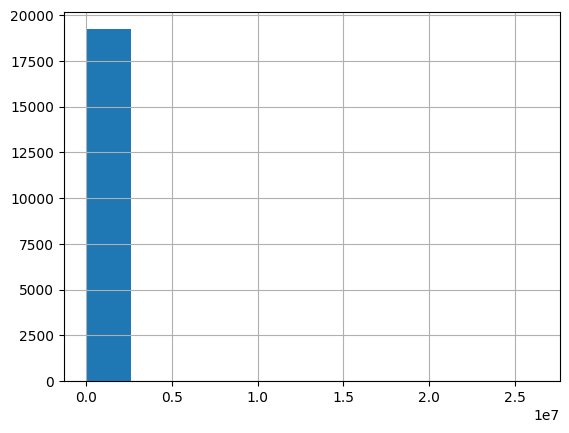

In [ ]:
df_ohe['Price'].hist()

# X & Y split

In [ ]:
X= df_ohe.drop('Price', axis=1)
y= df_ohe['Price']

In [ ]:
X.shape,y.shape

((19237, 115), (19237,))

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,
                                                 random_state=7)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((13465, 115), (5772, 115), (13465,), (5772,))

# Create NN model for regression

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input

In [ ]:
n_features = X_train.shape[1]
n_features

115

In [ ]:
# define model
model1 = Sequential()
model1.add(Input((n_features,)))
model1.add(Dense(5, activation='relu'))
model1.add(Dense(1, activation='linear'))

In [ ]:
model1.summary()

In [ ]:
model1.compile(optimizer='adam',loss="mse", metrics=['mae','r2_score'])

In [ ]:
# fit the model (training)
history = model1.fit( X_train, y_train, epochs=100, batch_size=32,
                     validation_split=0.3, verbose=2,shuffle=False)

Epoch 1/100
295/295 - 1s - 3ms/step - loss: 2396664102912.0000 - mae: 58617.3789 - r2_score: -3.1528e+01 - val_loss: 58638254080.0000 - val_mae: 21766.7207 - val_r2_score: -1.6994e+02
Epoch 2/100
295/295 - 1s - 4ms/step - loss: 103104593920.0000 - mae: 23924.2480 - r2_score: -3.9936e-01 - val_loss: 936340736.0000 - val_mae: 17190.1875 - val_r2_score: -1.7296e+00
Epoch 3/100
295/295 - 1s - 3ms/step - loss: 74202759168.0000 - mae: 20005.3457 - r2_score: -7.0953e-03 - val_loss: 627170752.0000 - val_mae: 16856.3027 - val_r2_score: -8.2830e-01
Epoch 4/100
295/295 - 1s - 4ms/step - loss: 74070556672.0000 - mae: 19761.4258 - r2_score: -5.3011e-03 - val_loss: 627009472.0000 - val_mae: 16850.6113 - val_r2_score: -8.2783e-01
Epoch 5/100
295/295 - 1s - 4ms/step - loss: 74070409216.0000 - mae: 19755.8066 - r2_score: -5.2991e-03 - val_loss: 626967936.0000 - val_mae: 16849.3984 - val_r2_score: -8.2771e-01
Epoch 6/100
295/295 - 1s - 4ms/step - loss: 74070360064.0000 - mae: 19754.6504 - r2_score: -5.2

In [ ]:
loss, mae = model1.evaluate(X_test, y_test, verbose=0)
print('Test mae: %.3f' % mae)

Test mae: 17688.422


In [ ]:
y.mean()

18555.92722357956

In [ ]:
y.min(),y.max(),y.std()

(1, 26307500, 190581.26968400902)

# Regularization

- L1

feature selection


- L2

reduce coefficient values also known as weight decay

- ElasticNet ( l1 & L2 )


- Dropout Layer

It controls how much of the input is passed to the next layer. This reduces overfitting.


- Batch Normalization

After calculation of the loss for complete batch, gradients are normalized for improved performance and stability in learning. It tends to make NN processing slow.

## Dropout layer

In [ ]:
model1 = Sequential()
model1.add(Input((n_features,)))
model1.add(Dense(5, activation='relu'))
# model1.add(Dense(100, activation='relu'))
# model1.add(Dense(800, activation='relu'))
# model1.add(Dense(8, activation='relu'))
model1.add(Dropout(0.1))
model1.add(Dense(1, activation='linear'))

In [ ]:
model1.compile(optimizer='adam',loss="mse", metrics=['mae'])

In [ ]:
# fit the model (training)
history = model1.fit( X_train, y_train, epochs=100, batch_size=32,
                     validation_split=0.3, verbose=2,shuffle=False)

Epoch 1/100
295/295 - 2s - 7ms/step - loss: 21879788142592.0000 - mae: 165580.1875 - val_loss: 2278296387584.0000 - val_mae: 49099.0820
Epoch 2/100
295/295 - 1s - 3ms/step - loss: 14009716703232.0000 - mae: 97895.3359 - val_loss: 1712116224.0000 - val_mae: 17714.2852
Epoch 3/100
295/295 - 1s - 4ms/step - loss: 4706539667456.0000 - mae: 52320.1836 - val_loss: 12889422848.0000 - val_mae: 19077.2969
Epoch 4/100
295/295 - 1s - 3ms/step - loss: 6922194911232.0000 - mae: 71562.5703 - val_loss: 22159562752.0000 - val_mae: 20684.1875
Epoch 5/100
295/295 - 1s - 4ms/step - loss: 116606517248.0000 - mae: 26155.1973 - val_loss: 1067537728.0000 - val_mae: 17262.2344
Epoch 6/100


KeyboardInterrupt: 

In [ ]:
loss, mae = model1.evaluate(X_test, y_test, verbose=0)
print('Test mae: %.3f' % mae)

Test mae: 17724.312


## Batch Normalization layer

In [ ]:
from tensorflow.keras.layers import BatchNormalization

In [ ]:
model1 = Sequential()
model1.add(Input((n_features,)))
model1.add(Dense(5, activation='relu'))
# model1.add(Dense(100, activation='relu'))
# model1.add(Dense(800, activation='relu'))
# model1.add(Dense(8, activation='relu'))
model1.add(BatchNormalization())
model1.add(Dense(1, activation='linear'))

In [ ]:
model1.compile(optimizer='adam',loss="mse", metrics=['mae'])

In [ ]:
# fit the model (training)
history = model1.fit( X_train, y_train, epochs=100, batch_size=32,
                     validation_split=0.3, verbose=2,shuffle=False)

Epoch 1/100
295/295 - 2s - 8ms/step - loss: 74070745088.0000 - mae: 19768.5371 - val_loss: 627360896.0000 - val_mae: 16862.0820
Epoch 2/100
295/295 - 2s - 6ms/step - loss: 74070712320.0000 - mae: 19768.0781 - val_loss: 627338304.0000 - val_mae: 16861.5176
Epoch 3/100
295/295 - 2s - 6ms/step - loss: 74070679552.0000 - mae: 19767.4023 - val_loss: 627310400.0000 - val_mae: 16860.7520
Epoch 4/100
295/295 - 1s - 3ms/step - loss: 74070679552.0000 - mae: 19766.5469 - val_loss: 627275840.0000 - val_mae: 16859.7832
Epoch 5/100
295/295 - 1s - 4ms/step - loss: 74070614016.0000 - mae: 19765.4492 - val_loss: 627233152.0000 - val_mae: 16858.5859
Epoch 6/100
295/295 - 1s - 5ms/step - loss: 74070556672.0000 - mae: 19764.1641 - val_loss: 627184192.0000 - val_mae: 16857.2051
Epoch 7/100
295/295 - 2s - 6ms/step - loss: 74070523904.0000 - mae: 19762.6602 - val_loss: 627126336.0000 - val_mae: 16855.5898
Epoch 8/100
295/295 - 2s - 6ms/step - loss: 74070474752.0000 - mae: 19760.9531 - val_loss: 627061696.000

In [ ]:
loss, mae = model1.evaluate(X_test, y_test, verbose=0)
print('Test mae: %.3f' % mae)

Test mae: 17119.924


## L1 & L2 regularization

In [ ]:
from tensorflow.keras import regularizers

In [ ]:
model1 = Sequential()
model1.add(Input((n_features,)))
model1.add(Dense(5,  kernel_regularizer=regularizers.L1L2(),
                 activation='relu'))
# model1.add(Dense(100, activation='relu'))
# model1.add(Dense(800, activation='relu'))
# model1.add(Dense(8, activation='relu'))
model1.add(Dense(1, activation='linear'))

In [ ]:
model1.compile(optimizer='adam',loss="mse", metrics=['mae'])

In [ ]:
# fit the model (training)
history = model1.fit( X_train, y_train, epochs=100, batch_size=32,
                     validation_split=0.3, verbose=2,shuffle=False)

Epoch 1/100
295/295 - 2s - 6ms/step - loss: 2478312521728.0000 - mae: 58826.3555 - val_loss: 3059168000.0000 - val_mae: 17827.1055
Epoch 2/100
295/295 - 0s - 2ms/step - loss: 74825703424.0000 - mae: 20215.7148 - val_loss: 627578496.0000 - val_mae: 16868.0312
Epoch 3/100
295/295 - 1s - 2ms/step - loss: 74070671360.0000 - mae: 19764.3164 - val_loss: 627159552.0000 - val_mae: 16855.3477
Epoch 4/100
295/295 - 1s - 2ms/step - loss: 74070532096.0000 - mae: 19761.0859 - val_loss: 627099840.0000 - val_mae: 16853.6152
Epoch 5/100
295/295 - 1s - 2ms/step - loss: 74070507520.0000 - mae: 19759.5098 - val_loss: 627037184.0000 - val_mae: 16851.7188
Epoch 6/100
295/295 - 1s - 2ms/step - loss: 74070466560.0000 - mae: 19758.0859 - val_loss: 626980800.0000 - val_mae: 16849.8242
Epoch 7/100
295/295 - 1s - 4ms/step - loss: 74070376448.0000 - mae: 19757.8359 - val_loss: 626942656.0000 - val_mae: 16849.7656
Epoch 8/100
295/295 - 1s - 4ms/step - loss: 74070417408.0000 - mae: 19759.1602 - val_loss: 626940544.

In [ ]:
loss, mae = model1.evaluate(X_test, y_test, verbose=0)
print('Test mae: %.3f' % mae)

Test mae: 17556.889
